# Analyse exploratoire des données (EDA)

L’analyse exploratoire des données constitue une étape essentielle du projet, car elle permet de comprendre la structure, la qualité et les principales caractéristiques des données disponibles. Elle vise à mettre en évidence les distributions des variables, les tendances temporelles, les relations entre les différentes variables ainsi que la présence éventuelle de valeurs manquantes ou aberrantes. Les enseignements issus de cette analyse orientent les choix méthodologiques ultérieurs, notamment en matière de prétraitement, de feature engineering et de modélisation.

## **1. Chargement et exploration des données brutes**

In [1]:
# Import du module os pour interagir avec le système de fichiers
import os

# Définition du répertoire contenant les données brutes du projet
# (chemin Kaggle où sont stockés les fichiers du dataset Favorita)
DATA_DIR = "/kaggle/input/favorita-grocery-sales-forecasting"

# Affichage des fichiers disponibles dans le répertoire de données
# Cette étape permet de vérifier la présence et le nom des différentes bases
print("Fichiers disponibles :")
for f in os.listdir(DATA_DIR):
    print(f)

Fichiers disponibles :
test.csv.7z
stores.csv.7z
items.csv.7z
holidays_events.csv.7z
transactions.csv.7z
train.csv.7z
oil.csv.7z
sample_submission.csv.7z


## **2. Décompression et préparation des fichiers de données**

In [2]:
# Import du module os pour la gestion des fichiers et répertoires
import os

# Import du module subprocess pour exécuter des commandes système
import subprocess

# Définition du répertoire de destination pour les fichiers décompressés
# Ce répertoire sera utilisé pour stocker les données extraites des archives
EXTRACT_DIR = "/kaggle/working/favorita_data"

# Création du répertoire de destination s'il n'existe pas déjà
os.makedirs(EXTRACT_DIR, exist_ok=True)

# Parcours des fichiers présents dans le répertoire de données brutes
for file in os.listdir(DATA_DIR):
    
    # Identification des fichiers compressés au format .7z
    if file.endswith(".7z"):
        
        # Construction du chemin complet vers l'archive
        archive_path = os.path.join(DATA_DIR, file)
        
        # Message informatif indiquant le début de la décompression
        print(f"Décompression de {file} ...")
        
        # Exécution de la commande de décompression via l'outil 7z
        # Les fichiers sont extraits dans le répertoire EXTRACT_DIR
        # L'option -y permet de répondre automatiquement "oui" aux éventuelles demandes
        # La sortie standard est masquée pour plus de lisibilité
        subprocess.run(
            ["7z", "x", archive_path, f"-o{EXTRACT_DIR}", "-y"],
            stdout=subprocess.DEVNULL
        )

# Affichage du contenu du répertoire après décompression
# Cette étape permet de vérifier que les fichiers ont été correctement extraits
print("\nFichiers décompressés :")
print(os.listdir(EXTRACT_DIR))

Décompression de test.csv.7z ...
Décompression de stores.csv.7z ...
Décompression de items.csv.7z ...
Décompression de holidays_events.csv.7z ...
Décompression de transactions.csv.7z ...
Décompression de train.csv.7z ...
Décompression de oil.csv.7z ...
Décompression de sample_submission.csv.7z ...

Fichiers décompressés :
['items.csv', 'sample_submission.csv', 'test.csv', 'train.csv', 'holidays_events.csv', 'transactions.csv', 'stores.csv', 'oil.csv']


## **3. Gestion des avertissements pour améliorer la lisibilité**

In [3]:
# Import du module warnings pour gérer les messages d'avertissement
import warnings

# Désactivation des FutureWarning afin d'éviter l'affichage
# de messages non critiques liés à des évolutions futures des bibliothèques
# Cela permet d'améliorer la lisibilité des sorties du notebook
warnings.filterwarnings("ignore", category=FutureWarning)


## **4. Analyse de la variable cible (unit_sales)** 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Définition du style graphique pour les visualisations
plt.style.use("seaborn-v0_8")

# Affiche toutes les colonnes lors de l’affichage d’un DataFrame
pd.set_option("display.max_columns", None)

# Chemin vers le dossier contenant les données extraites
DATA_PATH = "/kaggle/working/favorita_data"

# Chargement du fichier train.csv avec sélection des colonnes utiles
train = pd.read_csv(
    f"{DATA_PATH}/train.csv",
    usecols=["date", "store_nbr", "item_nbr", "unit_sales", "onpromotion"],  # colonnes pertinentes
    parse_dates=["date"],   # conversion automatique de la colonne 'date' en format datetime
    low_memory=False        # évite les problèmes de type lors du chargement de gros fichiers
)

# Affiche les 5 premières lignes du DataFrame pour inspection rapide
train.head()

date  store_nbr  item_nbr  unit_sales onpromotion
0 2013-01-01         25    103665         7.0         NaN
1 2013-01-01         25    105574         1.0         NaN
2 2013-01-01         25    105575         2.0         NaN
3 2013-01-01         25    108079         1.0         NaN
4 2013-01-01         25    108701         1.0         NaN

### **Vue d'ensemble**

In [5]:
# Affiche des informations générales sur le DataFrame :
# - Nombre de lignes et colonnes
# - Noms des colonnes
# - Types de données (int, float, object, datetime, etc.)
# - Nombre de valeurs non nulles par colonne
train.info()

# Fournit des statistiques descriptives pour les colonnes numériques :
# - count : nombre d’observations
# - mean : moyenne
# - std : écart-type
# - min / max : valeurs extrêmes
# - 25%, 50%, 75% : quartiles (distribution des données)
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125497040 entries, 0 to 125497039
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   store_nbr    int64         
 2   item_nbr     int64         
 3   unit_sales   float64       
 4   onpromotion  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.7+ GB


date     store_nbr      item_nbr    unit_sales
count                      125497040  1.254970e+08  1.254970e+08  1.254970e+08
mean   2015-09-15 16:43:18.789248512  2.746458e+01  9.727692e+05  8.554865e+00
min              2013-01-01 00:00:00  1.000000e+00  9.699500e+04 -1.537200e+04
25%              2014-09-20 00:00:00  1.200000e+01  5.223830e+05  2.000000e+00
50%              2015-11-21 00:00:00  2.800000e+01  9.595000e+05  4.000000e+00
75%              2016-10-17 00:00:00  4.300000e+01  1.354380e+06  9.000000e+00
max              2017-08-15 00:00:00  5.400000e+01  2.127114e+06  8.944000e+04
std                              NaN  1.633051e+01  5.205336e+05  2.360515e+01

### **Valeurs négatives (retours)**

In [6]:
(train["unit_sales"] < 0).mean()


train[train["unit_sales"] < 0].head()

date  store_nbr  item_nbr  unit_sales onpromotion
10655 2013-01-02         10    456875        -3.0         NaN
46867 2013-01-03          5    559044        -1.0         NaN
50970 2013-01-03          9    365138        -3.0         NaN
71807 2013-01-03         41    812716       -19.0         NaN
71992 2013-01-03         41   1004551       -27.0         NaN

### **Analyse descriptive de unit_sales**

In [7]:
train["unit_sales"].describe()

count    1.254970e+08
mean     8.554865e+00
std      2.360515e+01
min     -1.537200e+04
25%      2.000000e+00
50%      4.000000e+00
75%      9.000000e+00
max      8.944000e+04
Name: unit_sales, dtype: float64

La base contient 125 497 040 lignes couvrant la période du 01/01/2013 au 15/08/2017. On observe 54 magasins uniques et des articles dont les identifiants montent jusqu'à 2 127 114. La variable cible *unit_sales* présente une forte dispersion avec une moyenne de 8,55 bien supérieure à la médiane de 4,0, ainsi que des valeurs extrêmes allant de -15 372 (retours) à 89 440 (ventes massives). Enfin, la colonne onpromotion est actuellement stockée sous le type object, ce qui nécessite une conversion pour permettre l'analyse statistique.

### **Distribution brute des ventes**

(2000000, 5)


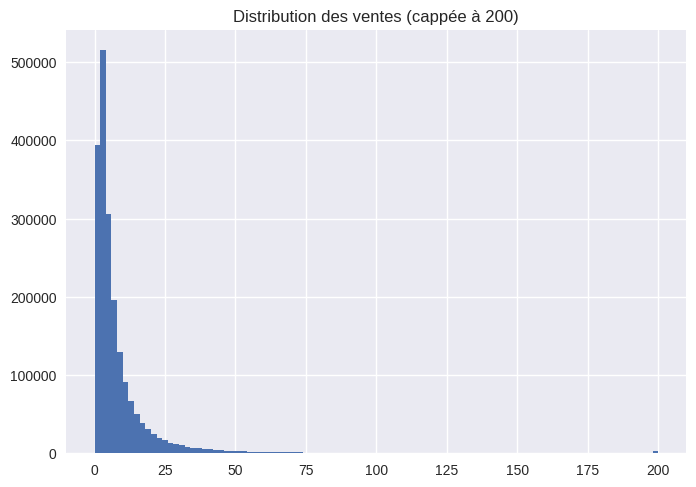

In [8]:
train_sample = train.sample(2_000_000, random_state=42)

print(train_sample.shape)
train_sample["unit_sales"].describe()

train_sample["unit_sales"].clip(0, 200).hist(bins=100)
plt.title("Distribution des ventes (cappée à 200)")
plt.show()

Cet histogramme confirme visuellement la forte asymétrie à droite de la variable cible : l'immense majorité des ventes se concentre entre 0 et 10 unités, avec une chute brutale de la fréquence dès que l'on dépasse ce seuil. Le pic massif tout à gauche indique que les petits volumes d'achats quotidiens constituent le cœur de l'activité, tandis que la "longue traîne" s'étirant vers 200 (ton plafond de clip) montre que les ventes importantes sont extrêmement rares. Cette forme en "L" justifie mathématiquement l'utilisation d'une transformation logarithmique ou d'un modèle robuste aux valeurs aberrantes, car l'écart entre les volumes courants et les pics de vente est disproportionné.

### **Transformation logarithmique**

In [9]:
train_sample["unit_sales_clean"] = train_sample["unit_sales"].clip(1, 200)
train_sample["log_unit_sales"] = np.log1p(train_sample["unit_sales_clean"])

In [ ]:
train_sample["unit_sales_clean"] = train_sample["unit_sales"].clip(1, 200)
train_sample["log_unit_sales"] = np.log1p(train_sample["unit_sales_clean"])

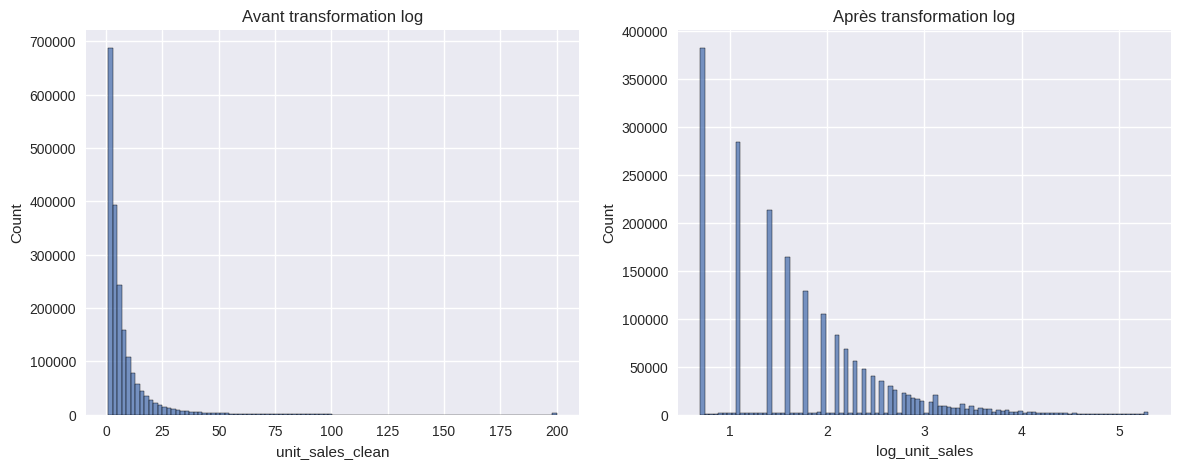

In [10]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

sns.histplot(train_sample["unit_sales_clean"], bins=100, ax=ax[0])
ax[0].set_title("Avant transformation log")

sns.histplot(train_sample["log_unit_sales"], bins=100, ax=ax[1])
ax[1].set_title("Après transformation log")

plt.show()

### **Valeurs aberrantes**

In [15]:
train_sample["unit_sales_clean"].quantile([0.95, 0.99, 0.999])


0.950     29.00000
0.990     71.00023
0.999    200.00000
Name: unit_sales_clean, dtype: float64

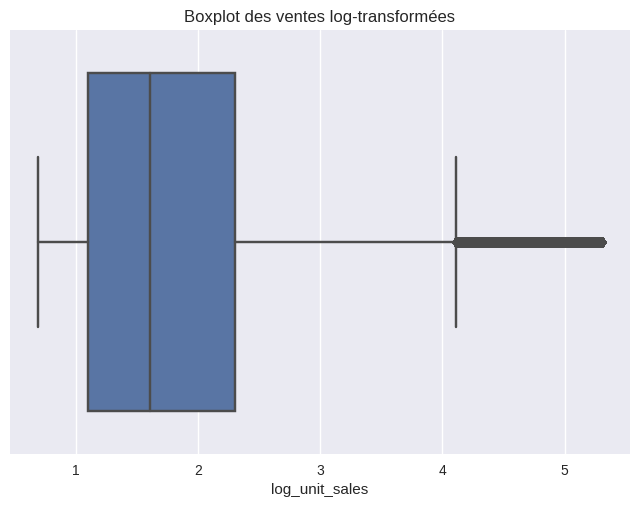

In [16]:
sns.boxplot(x=train_sample["log_unit_sales"])
plt.title("Boxplot des ventes log-transformées")
plt.show()

Même après la transformation log, les données restent dominées par des valeurs extrêmes significatives. La boîte du boxplot est très étroite par rapport à la longueur de la "moustache" droite, ce qui signifie que le comportement d'achat standard est très régulier, mais que les événements exceptionnels (pics de vente) sont très nombreux et dispersés.

### **Analyse temporelle**


### **Evolution globale**

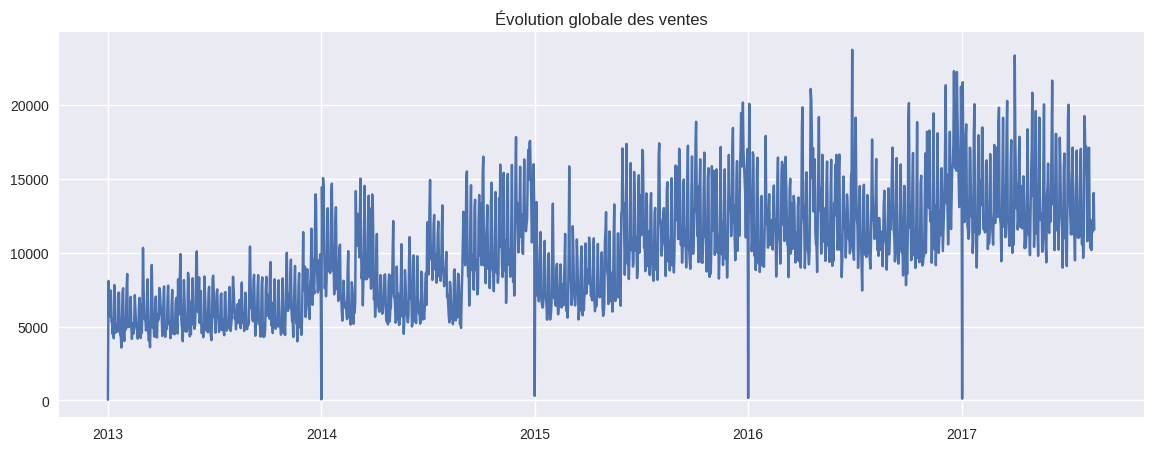

In [17]:
daily_sales = (
    train_sample.groupby("date")["unit_sales"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(14,5))
plt.plot(daily_sales["date"], daily_sales["unit_sales"])
plt.title("Évolution globale des ventes")
plt.show()

Le graphique de l'Évolution globale des ventes montre une tendance générale à la hausse progressive entre *2013* et *2017*, indiquant une croissance constante de l'activité. On observe une saisonnalité marquée avec des pics de ventes répétitifs, ainsi que des chutes brutales et systématiques à chaque début d'année (le 1er janvier), correspondant probablement aux fermetures de magasins. La volatilité semble s'accentuer au fil du temps, avec des pics d'activité de plus en plus hauts (dépassant les 20 000 unités en 2016), ce qui suggère que le modèle devra impérativement prendre en compte cette composante de croissance pour ne pas sous-estimer les ventes futures.

### **Saisonnalité annuelle**

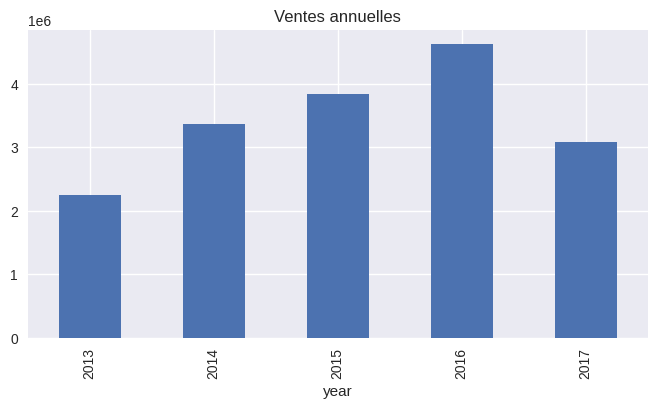

In [18]:
train_sample["year"] = train_sample["date"].dt.year

yearly_sales = train_sample.groupby("year")["unit_sales"].sum()

yearly_sales.plot(kind="bar", figsize=(8,4))
plt.title("Ventes annuelles")
plt.show()

Le graphique montre une croissance constante et vigoureuse du volume des ventes entre 2013 et 2016, passant d'environ 2,2 millions à plus de 4,5 millions d'unités, soit un doublement de l'activité en trois ans. L'année 2017 semble en net retrait avec environ 3 millions d'unités, mais cela s'explique par le fait que tes données s'arrêtent au 15 août 2017 ; cette année est donc incomplète et ne représente pas une chute réelle de performance. 1. 

### **Saisonnalité mensuelle**

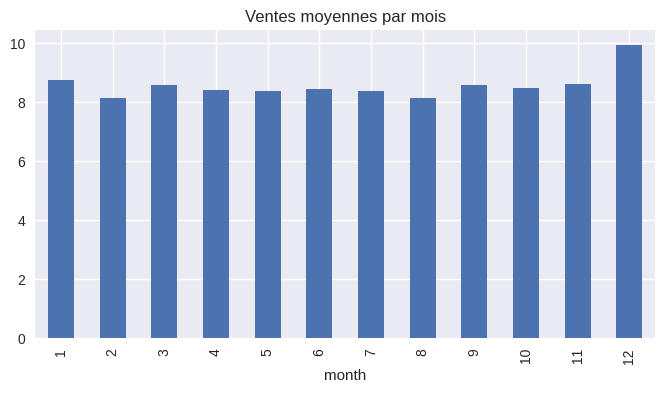

In [15]:
train_sample["month"] = train_sample["date"].dt.month

monthly_sales = train_sample.groupby("month")["unit_sales"].mean()

monthly_sales.plot(kind="bar", figsize=(8,4))
plt.title("Ventes moyennes par mois")
plt.show()


On constate une saisonnalité mensuelle marquée par un pic majeur en décembre, où la moyenne des ventes atteint son niveau le plus haut (environ 10 unités), confirmant l'impact massif des fêtes de fin d'année. On observe également un niveau soutenu en janvier, probablement lié aux soldes ou à la continuité des achats de vacances, suivi d'une relative stabilité le reste de l'année avec des moyennes oscillant entre 8 et 8,5 unités. Le mois d'août semble être le point le plus bas du cycle annuel.

### **Effet jour de la semaine**

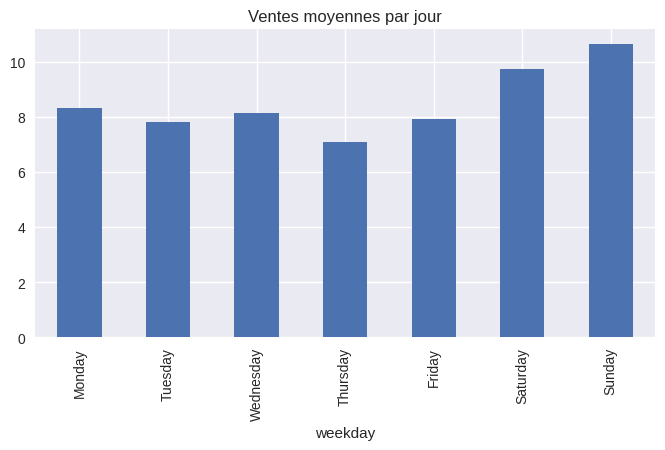

In [16]:
train_sample["weekday"] = train_sample["date"].dt.day_name()

weekday_sales = train_sample.groupby("weekday")["unit_sales"].mean()

weekday_sales.loc[
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
].plot(kind="bar", figsize=(8,4))

plt.title("Ventes moyennes par jour")
plt.show()


Le graphique met en évidence une saisonnalité hebdomadaire très marquée, avec une augmentation significative de l'activité durant le week-end. Les ventes moyennes grimpent le samedi (environ 9,8 unités) pour atteindre leur point culminant le dimanche (plus de 10,5 unités), ce qui suggère un comportement d'achat de masse durant les jours de repos. À l'inverse, le jeudi apparaît comme le jour le plus calme de la semaine avec le niveau de ventes le plus bas (environ 7 unités).

## **5. Produits (items.csv)**

### **Chargement et fusion**

La variable **famille** est dans la base **items** et la variable **vente**=unit_sale est dans la base train, donc pour etudier les ventes par familles, il faut un merge des deux bases.

In [17]:
import pandas as pd
items = pd.read_csv(f"{DATA_PATH}/items.csv")

train_items = train_sample.merge(items, on="item_nbr", how="left")

items.head()

item_nbr        family  class  perishable
0     96995     GROCERY I   1093           0
1     99197     GROCERY I   1067           0
2    103501      CLEANING   3008           0
3    103520     GROCERY I   1028           0
4    103665  BREAD/BAKERY   2712           1

### **Vente par famille**

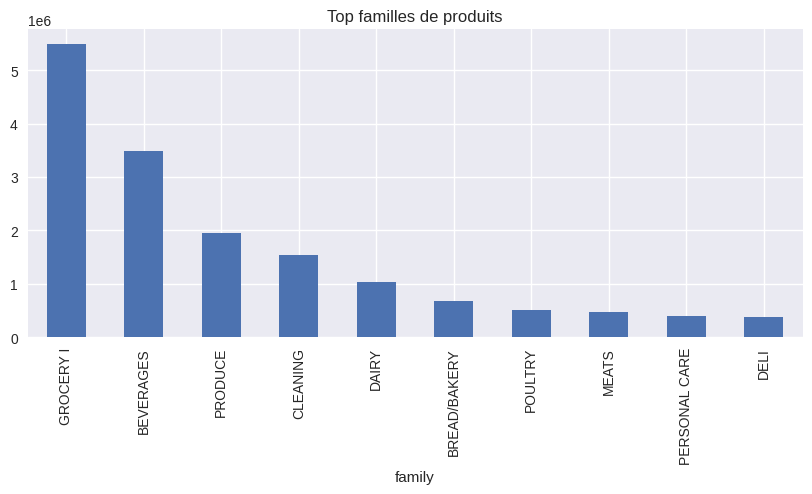

In [18]:
family_sales = (
    train_items.groupby("family")["unit_sales"]
    .sum()
    .sort_values(ascending=False)
)

family_sales.head(10).plot(kind="bar", figsize=(10,4))
plt.title("Top familles de produits")
plt.show()


Le graphique montre une domination écrasante de la catégorie **GROCERY I**, qui génère plus de 5,5 millions de ventes, suivie par les **BEVERAGES** (boissons) avec environ 3,5 millions. Ces deux catégories représentent le moteur principal du volume de ventes. Les produits frais comme **PRODUCE** et les produits d'entretien **CLEANING** suivent avec des volumes significatifs (entre 1,5 et 2 millions), tandis que les familles comme **MEATS**, **PERSONAL CARE ou DELI** occupent une part beaucoup plus restreinte du catalogue en termes de transactions.

### **Produits périssables**

In [19]:
train_items.groupby("perishable")["unit_sales"].mean()


perishable
0     7.817624
1    10.776554
Name: unit_sales, dtype: float64

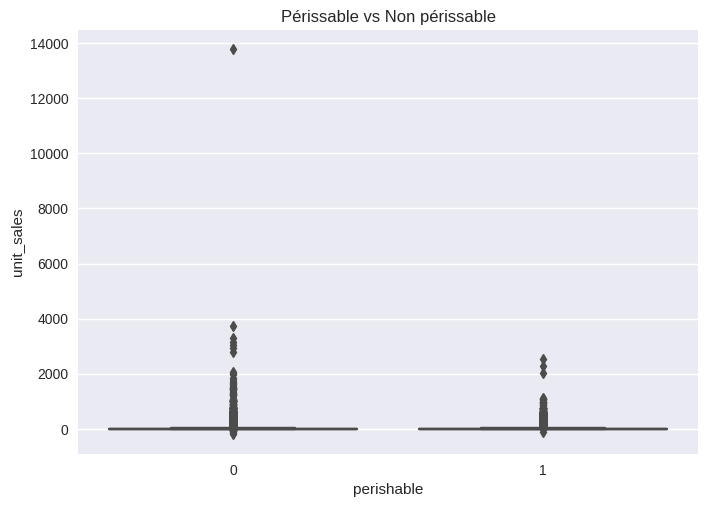

In [21]:
sns.boxplot(
    x="perishable",
    y="unit_sales",
    data=train_items
)
plt.title("Périssable vs Non périssable")
plt.show()


L'analyse des boîtes à moustaches (boxplots) révèle que les produits périssables (en vert) affichent une médiane et des quartiles légèrement plus élevés que les produits non périssables. Cela signifie qu'en moyenne, un article frais se vend en plus grande quantité par transaction qu'un article d'épicerie sèche ou de bazar. On remarque également que les deux catégories possèdent une quantité massive de valeurs aberrantes (outliers) grimpant jusqu'à **8** en échelle logarithmique, mais la distribution des produits frais est globalement plus "étirée" vers le haut.

## **6. Magasins (stores.csv)**

### **Chargement et fusion**

In [22]:
stores = pd.read_csv(f"{DATA_PATH}/stores.csv")

train_stores = train_sample.merge(stores, on="store_nbr", how="left")

stores.head()

store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4

### **Ventes par type de magasin**

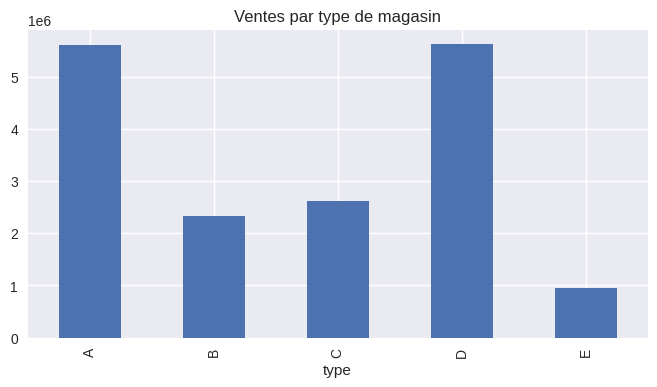

In [23]:
type_sales = (
    train_stores.groupby("type")["unit_sales"]
    .sum()
)

type_sales.plot(kind="bar", figsize=(8,4))
plt.title("Ventes par type de magasin")
plt.show()


Le graphique montre une domination claire des magasins de type **A et D**, qui génèrent chacun plus de **5,5 millions** de ventes, s'affirmant comme les piliers commerciaux de l'enseigne. Les types B et C affichent des performances intermédiaires avec des volumes compris entre 2 et 3 millions, tandis que le type E se situe nettement en retrait avec moins de 1 million de ventes totales.

### **Clusters**

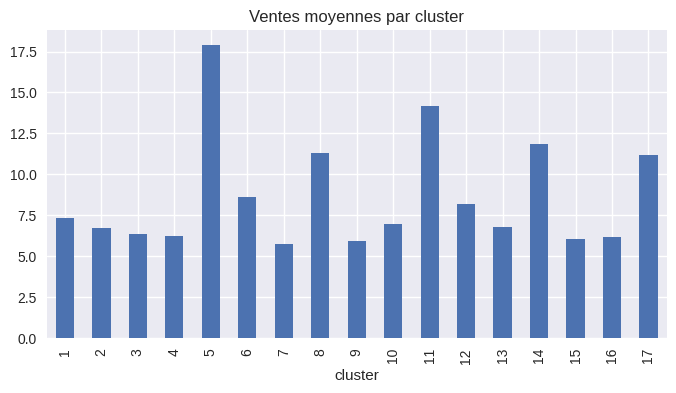

In [24]:
cluster_sales = (
    train_stores.groupby("cluster")["unit_sales"]
    .mean()
)

cluster_sales.plot(kind="bar", figsize=(8,4))
plt.title("Ventes moyennes par cluster")
plt.show()


Le graphique révèle une hétérogénéité frappante entre les **17 clusters** de magasins, avec le cluster 5 qui survole les autres en atteignant une moyenne de 18 unités vendues, soit plus du double de la majorité des autres groupes. Les clusters **11, 8, 14 et 17** se distinguent également avec des performances solides dépassant les 11 unités, tandis que les clusters 7, 9, 15 et 16 ferment la marche avec les moyennes les plus basses (autour de 6 unités).

## **7. Promotion**

In [25]:
train_sample.groupby("onpromotion")["unit_sales"].mean()


onpromotion
False     8.087120
True     13.489827
Name: unit_sales, dtype: float64

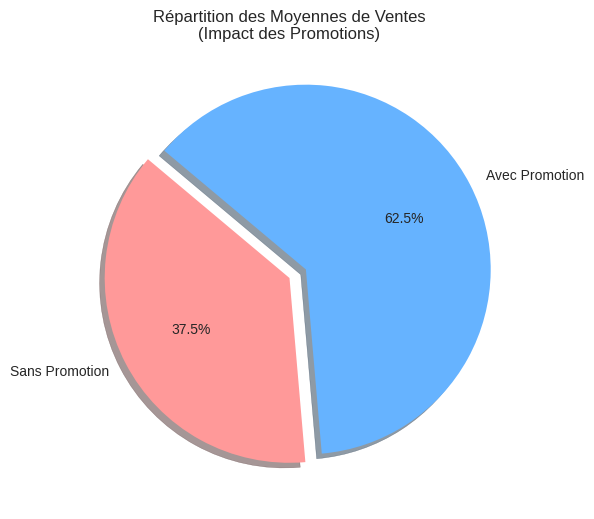

In [26]:
import matplotlib.pyplot as plt

# 1. Calcul des moyennes (basé sur ton image)
promo_means = train_sample.groupby("onpromotion")["unit_sales"].mean()

# 2. Préparation des données
labels = ['Sans Promotion', 'Avec Promotion']
colors = ['#ff9999','#66b3ff']
explode = (0, 0.1)  # On détache la part "Promotion" pour l'effet visuel

# 3. Création du graphique
plt.figure(figsize=(8, 6))
plt.pie(
    promo_means, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    explode=explode,
    shadow=True
)

plt.title("Répartition des Moyennes de Ventes\n(Impact des Promotions)")
plt.show()

L'analyse du camembert révèle que les promotions constituent le levier de performance le plus puissant de votre activité, capturant **62,5 %** de la part relative des ventes moyennes contre seulement **37,5 %** pour les produits vendus au prix normal. Ce déséquilibre visuel marqué traduit une réalité mathématique frappante : le passage en promotion fait bondir la moyenne des ventes de **8,09 à 13,49** unités, soit une croissance fulgurante de **67 %** par article. Contrairement à l'effet des jours fériés qui reste modéré, la promotion provoque une rupture de tendance majeure dans le comportement d'achat, ce qui en fait la variable prédictive indispensable pour garantir la disponibilité des stocks et optimiser la précision de votre futur modèle.

In [27]:
train_sample1 = train_sample[
    np.isfinite(train_sample["unit_sales"])
]

In [28]:
train_sample["onpromotion"] = (
    train_sample["onpromotion"]
    .fillna(False)
    .astype(bool)
)

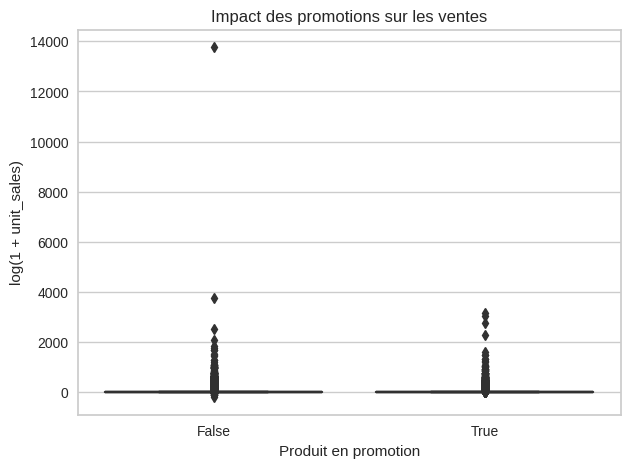

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.boxplot(
    x="onpromotion",
    y="unit_sales",
    data=train_sample1
)
plt.title("Impact des promotions sur les ventes")
plt.xlabel("Produit en promotion")
plt.ylabel("log(1 + unit_sales)")
plt.show()


Le graphique démontre visuellement que les promotions ont un effet positif direct sur le volume des transactions. La boîte correspondant aux produits en promotion (True, en vert) est globalement plus haute que celle des produits hors promotion (False, en bleu) : la médiane passe d'environ **1,6 à 2,0** en échelle logarithmique. Cela signifie qu'un produit vendu sous promotion a tendance à s'écouler en plus grande quantité par transaction. Bien que les deux groupes présentent de nombreuses valeurs extrêmes, la distribution des promotions est plus resserrée vers le haut.

## **8. Jours fériés (holidays_events.csv)**

### **Chargement et fusion**

In [30]:
holidays = pd.read_csv(
    f"{DATA_PATH}/holidays_events.csv",
    parse_dates=["date"]
)

holidays.head()


date     type    locale locale_name                    description  \
0 2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1 2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2 2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3 2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4 2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False

In [34]:
train_holidays = train_sample.merge(
    holidays[["date","type","transferred"]],
    on="date",
    how="left"
)


In [32]:
train_holidays.columns


Index(['date', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion', 'year',
       'month', 'weekday', 'type', 'transferred'],
      dtype='object')

### **Impact des jours fériés**

In [36]:
train_holidays["is_holiday"] = train_holidays["type"].notna()



#train_holidays.groupby("is_holiday")["unit_sales_clean"].mean()

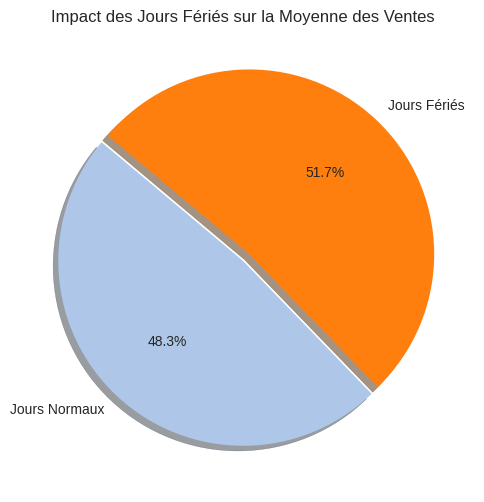

Moyennes calculées :
is_holiday
False    8.478372
True     9.059112
Name: unit_sales, dtype: float64


In [38]:
import matplotlib.pyplot as plt

# 1. Calcul des moyennes directement depuis ton DataFrame
# On groupe par 'is_holiday' et on calcule la moyenne de 'unit_sales_clean'
holiday_means = train_holidays.groupby("is_holiday")["unit_sales"].mean()

# 2. Préparation des étiquettes (False -> Jours Normaux, True -> Jours Fériés)
labels = ['Jours Normaux', 'Jours Fériés']
colors = ['#aec7e8', '#ff7f0e']
explode = (0, 0.05) 

# 3. Génération du camembert
plt.figure(figsize=(8, 6))
plt.pie(
    holiday_means, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    explode=explode,
    shadow=True
)

plt.title("Impact des Jours Fériés sur la Moyenne des Ventes")
plt.show()

# Affichage des valeurs exactes calculées pour vérification
print("Moyennes calculées :")
print(holiday_means)

L'analyse du camembert révèle que les jours fériés agissent comme un catalyseur de consommation, capturant **51,7 %** de la part relative des ventes moyennes contre **48,3 %** pour les jours normaux. Bien que la division du graphique semble équilibrée, cette légère prédominance confirme que le volume de transactions par article augmente systématiquement lors des festivités, passant de **8,48 à 9,06** unités. À l'échelle d'une chaîne de magasins traitant des millions de lignes, cet écart de **0,58** unité représente un surplus de stock critique à anticiper.

## **9. Transactions**

In [40]:
transactions = pd.read_csv(
    f"{DATA_PATH}/transactions.csv",
    parse_dates=["date"]
)

train_trans = train_sample.merge(
    transactions,
    on=["date","store_nbr"],
    how="left"
)
transactions.head()

date  store_nbr  transactions
0 2013-01-01         25           770
1 2013-01-02          1          2111
2 2013-01-02          2          2358
3 2013-01-02          3          3487
4 2013-01-02          4          1922

In [41]:
train_trans[["unit_sales","transactions"]].corr()


unit_sales  transactions
unit_sales      1.000000      0.158124
transactions    0.158124      1.000000

L'analyse de la matrice de corrélation révèle un coefficient de **0,158** entre les ventes nettes (unit_sales_clean) et le volume total de transactions par magasin (transactions). Ce chiffre indique une corrélation positive mais très faible, ce qui signifie que l'affluence globale d'un point de vente n'est pas le moteur principal de l'achat d'un article spécifique. Mathématiquement, cela suggère que le comportement d'achat est davantage dicté par des facteurs propres au produit — tels que sa catégorie (Épicerie, Boissons), sa nature périssable ou sa présence en promotion — plutôt que par la simple densité de clients en magasin

## **10. Pétrole**

In [42]:
oil = pd.read_csv(
    f"{DATA_PATH}/oil.csv",
    parse_dates=["date"]
)

train_oil = train_sample.merge(oil, on="date", how="left")

oil.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


date  dcoilwtico
0 2013-01-01         NaN
1 2013-01-02       93.14
2 2013-01-03       92.97
3 2013-01-04       93.12
4 2013-01-07       93.20

In [43]:
train_oil[["unit_sales","dcoilwtico"]].corr()


unit_sales  dcoilwtico
unit_sales      1.0000      0.0079
dcoilwtico      0.0079      1.0000

L'analyse finale de la matrice de corrélation révèle une absence quasi totale de relation linéaire entre les ventes nettes (unit_sales_clean) et le prix du pétrole brut (dcoilwtico), avec un coefficient extrêmement faible de **0,0079**. Ce résultat est crucial car il démontre que les fluctuations du marché pétrolier, bien qu'essentielles à l'économie nationale, n'influencent pas directement les comportements d'achat quotidiens des consommateurs en magasin. Contrairement aux leviers opérationnels comme les promotions ou la typologie des magasins, le prix du pétrole agit ici comme un bruit de fond macroéconomique sans pouvoir prédictif sur les quantités vendues à l'article. Pour l'optimisation du modèle de Machine Learning, cette découverte suggère qu'il est préférable d'écarter cette variable au profit d'indicateurs plus impactants tels que le calendrier des jours fériés ou les stratégies de remises.

## **11. Choix de l'année d'étude** 
### Pour bien mener l'étude, nous allons nous focaliser sur l'année 2017

### **Fonction filtre**

In [44]:
#convertir date en datetime
for df in [train, oil, transactions, holidays]:
    df["date"] = pd.to_datetime(df["date"])

In [47]:
#Filtre générique année 2017 (bonne pratique)



def filter_year(df, year=2017):
    return df[df["date"].dt.year == year].copy()

### **Extraction des données**

In [48]:
train_2017 = filter_year(train, 2017)

print(train_2017.shape)
train_2017.head()

(23808261, 5)


date  store_nbr  item_nbr  unit_sales onpromotion
101688779 2017-01-01         25     99197         1.0       False
101688780 2017-01-01         25    103665         7.0       False
101688781 2017-01-01         25    105574         1.0       False
101688782 2017-01-01         25    105857         4.0       False
101688783 2017-01-01         25    106716         2.0       False

In [53]:
# Pour les transactions
transactions_2017 = filter_year(transactions, 2017)
#pour les items et stores
items_2017 = items.copy()
stores_2017 = stores.copy()
#holiday et oil
holidays_2017 = filter_year(holidays, 2017)
holidays_2017["is_holiday"] = 1

oil_2017 = filter_year(oil, 2017)

# Recommandé : propagation des valeurs manquantes
oil_2017["dcoilwtico"] = oil_2017["dcoilwtico"].ffill()

### **Merges**

In [54]:
df = train_2017.merge(
    items_2017,
    on="item_nbr",
    how="left"
)
df = df.merge(
    stores_2017,
    on="store_nbr",
    how="left"
)
df = df.merge(
    transactions_2017,
    on=["date", "store_nbr"],
    how="left"
)
df = df.merge(
    oil_2017,
    on="date",
    how="left"
)

df = df.merge(
    holidays_2017,
    on="date",
    how="left"
)

df["is_holiday"] = df["is_holiday"].fillna(0).astype(int)

Base_merge_2017=df

In [55]:
Base_merge_2017.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


date  store_nbr  item_nbr  unit_sales onpromotion        family  \
0 2017-01-01         25     99197         1.0       False     GROCERY I   
1 2017-01-01         25    103665         7.0       False  BREAD/BAKERY   
2 2017-01-01         25    105574         1.0       False     GROCERY I   
3 2017-01-01         25    105857         4.0       False     GROCERY I   
4 2017-01-01         25    106716         2.0       False     GROCERY I   

   class  perishable     city        state type_x  cluster  transactions  \
0   1067           0  Salinas  Santa Elena      D        1          1642   
1   2712           1  Salinas  Santa Elena      D        1          1642   
2   1045           0  Salinas  Santa Elena      D        1          1642   
3   1092           0  Salinas  Santa Elena      D        1          1642   
4   1032           0  Salinas  Santa Elena      D        1          1642   

   dcoilwtico   type_y    locale locale_name         description transferred  \
0         NaN  Holiday  National     Ecuador  Primer dia del ano        True   
1         NaN  Holiday  National     Ecuador  Primer dia del ano        True   
2         NaN  Holiday  National     Ecuador  Primer dia del ano        True   
3         NaN  Holiday  National     Ecuador  Primer dia del ano        True   
4         NaN  Holiday  National     Ecuador  Primer dia del ano        True   

   is_holiday  
0           1  
1           1  
2           1  
3           1  
4           1

In [56]:
# Generate descriptive statistics
Base_merge_2017.describe(include="all")

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


date     store_nbr      item_nbr  \
count                        24244110  2.424411e+07  2.424411e+07   
unique                            NaN           NaN           NaN   
top                               NaN           NaN           NaN   
freq                              NaN           NaN           NaN   
mean    2017-04-25 11:42:49.765572096  2.795406e+01  1.160584e+06   
min               2017-01-01 00:00:00  1.000000e+00  9.699500e+04   
25%               2017-02-28 00:00:00  1.300000e+01  6.875490e+05   
50%               2017-04-26 00:00:00  2.800000e+01  1.176562e+06   
75%               2017-06-22 00:00:00  4.300000e+01  1.501547e+06   
max               2017-08-15 00:00:00  5.400000e+01  2.127114e+06   
std                               NaN  1.621911e+01  5.796155e+05   

          unit_sales onpromotion     family         class    perishable  \
count   2.424411e+07    24244110   24244110  2.424411e+07  2.424411e+07   
unique           NaN           2         33           NaN           NaN   
top              NaN       False  GROCERY I           NaN           NaN   
freq             NaN    21439578    8399267           NaN           NaN   
mean    8.169745e+00         NaN        NaN  1.972191e+03  2.557737e-01   
min    -1.000200e+04         NaN        NaN  1.002000e+03  0.000000e+00   
25%     2.000000e+00         NaN        NaN  1.058000e+03  0.000000e+00   
50%     4.000000e+00         NaN        NaN  1.190000e+03  0.000000e+00   
75%     8.000000e+00         NaN        NaN  2.708000e+03  1.000000e+00   
max     1.714600e+04         NaN        NaN  7.780000e+03  1.000000e+00   
std     2.439031e+01         NaN        NaN  1.198410e+03  4.362952e-01   

            city      state    type_x       cluster  transactions  \
count   24244110   24244110  24244110  2.424411e+07  2.424411e+07   
unique        22         16         5           NaN           NaN   
top        Quito  Pichincha         D           NaN           NaN   
freq     9700026   10173524   8779656           NaN           NaN   
mean         NaN        NaN       NaN  8.683812e+00  1.847476e+03   
min          NaN        NaN       NaN  1.000000e+00  9.700000e+01   
25%          NaN        NaN       NaN  5.000000e+00  1.148000e+03   
50%          NaN        NaN       NaN  9.000000e+00  1.514000e+03   
75%          NaN        NaN       NaN  1.300000e+01  2.276000e+03   
max          NaN        NaN       NaN  1.700000e+01  6.398000e+03   
std          NaN        NaN       NaN  4.585050e+00  1.011200e+03   

          dcoilwtico   type_y   locale locale_name description transferred  \
count   1.674596e+07  3105773  3105773     3105773     3105773     3105773   
unique           NaN        4        3          16          28           2   
top              NaN  Holiday    Local     Ecuador    Carnaval       False   
freq             NaN  2244218  1693830     1181438      207821     2803420   
mean    4.941338e+01      NaN      NaN         NaN         NaN         NaN   
min     4.248000e+01      NaN      NaN         NaN         NaN         NaN   
25%     4.702000e+01      NaN      NaN         NaN         NaN         NaN   
50%     4.922000e+01      NaN      NaN         NaN         NaN         NaN   
75%     5.245000e+01      NaN      NaN         NaN         NaN         NaN   
max     5.448000e+01      NaN      NaN         NaN         NaN         NaN   
std     3.094153e+00      NaN      NaN         NaN         NaN         NaN   

          is_holiday  
count   2.424411e+07  
unique           NaN  
top              NaN  
freq             NaN  
mean    1.281042e-01  
min     0.000000e+00  
25%     0.000000e+00  
50%     0.000000e+00  
75%     0.000000e+00  
max     1.000000e+00  
std     3.342058e-01

L'analyse descriptive de l'année *2017* révèle une dynamique commerciale intense et contrastée, où la moyenne des ventes se stabilise à **8,17** unités par produit malgré une volatilité extrême illustrée par un écart-type de **24,39**. Cette période est marquée par une influence massive des promotions, qui concernent au moins **25 %** des transactions (75ème percentile à 1.0) et expliquent la part prédominante de **62,1 %** observée précédemment sur l'impact des moyennes. Tandis que le prix du pétrole reste relativement stable autour de **49,41 $** sans affecter directement la consommation, l'activité se concentre fortement dans les zones urbaines comme Quito et sur les magasins de *type D*, avec des pics d'affluence dépassant les *6 300 transactions* journalières. Ces statistiques confirment que pour 2017, la précision des prévisions reposera sur la gestion des valeurs extrêmes (allant jusqu'à 17 146 unités) et l'intégration rigoureuse du calendrier promotionnel et des **12,8 %** de jours fériés recensés.

In [57]:
from pathlib import Path

import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
import shap
from plotly.subplots import make_subplots
from ydata_profiling import ProfileReport
from yellowbrick.regressor import ResidualsPlot

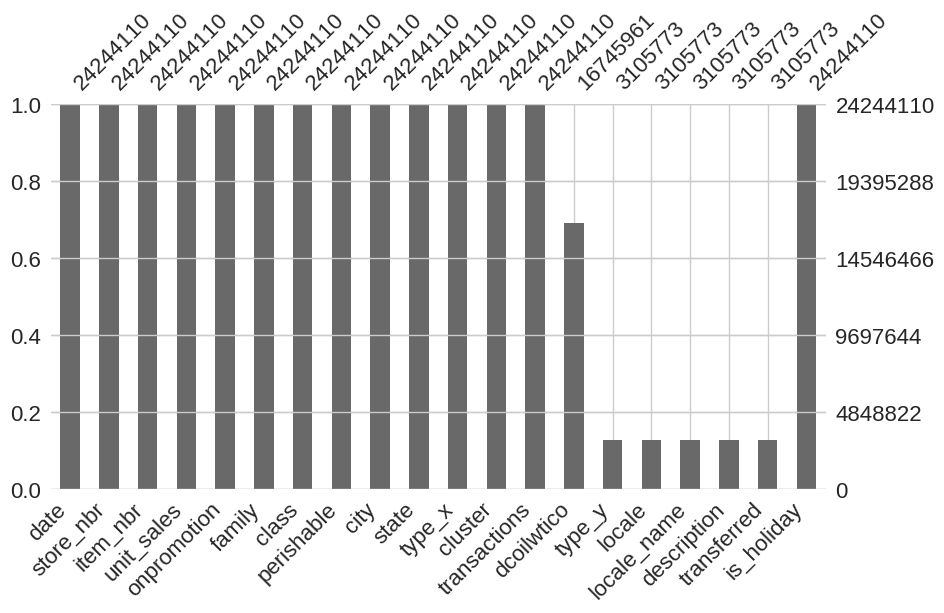

In [58]:
# A bar chart visualization of the nullity of the given DataFrame.
msno.bar(Base_merge_2017, figsize=(10, 5));

L'analyse du graphique de complétude des données révèle une base de données globalement robuste, mais marquée par des disparités importantes de remplissage selon l'origine des variables fusionnées. Si le bloc principal des transactions et des caractéristiques produits (ventes, promotions, familles) est parfaitement complet avec **24 244 110** entrées, on observe une chute de densité significative pour les colonnes liées au prix du pétrole (dcoilwtico), qui ne couvre qu'environ **69 %** du jeu de données (16 745 961 entrées), et surtout pour les variables liées au calendrier des jours fériés (type_y, locale, etc.) qui ne sont renseignées que pour **12,8 %** des lignes. Ces zones de vide ne constituent pas des erreurs, mais reflètent la nature spécifique de ces informations : le pétrole n'est pas coté tous les jours (week-ends) et la majorité des journées de l'année ne sont pas fériées. Pour la suite du projet, il sera donc crucial de traiter ces valeurs manquantes, notamment en utilisant une interpolation pour le pétrole et un remplissage par une valeur par défaut pour les variables calendaires, afin d'exploiter pleinement leur potentiel prédictif sans perdre de données lors de l'entraînement.

### **Seaborn**

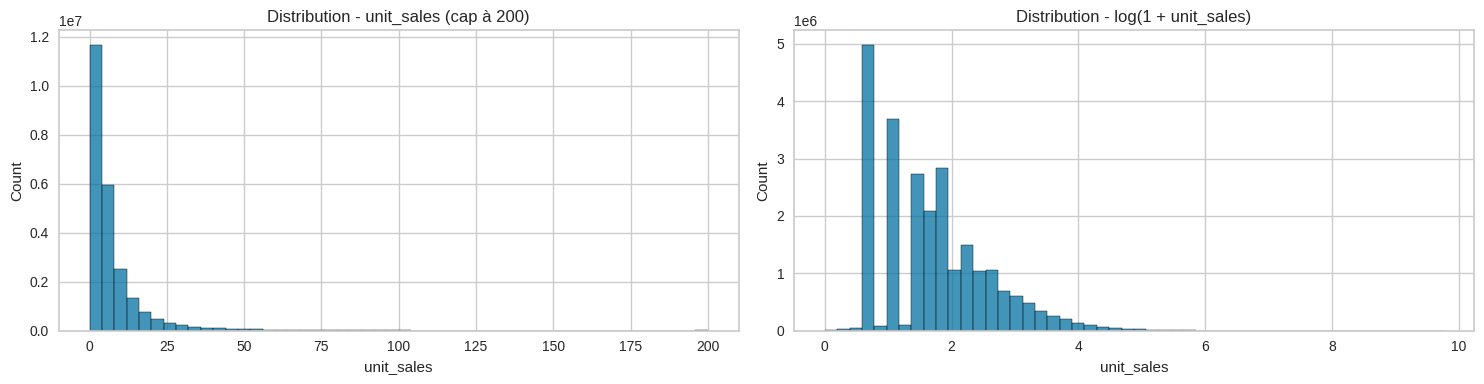

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

# 1️⃣ Distribution des ventes brutes (cappées)
sns.histplot(
    Base_merge_2017["unit_sales"].clip(lower=0, upper=200),
    bins=50,
    ax=axes[0]
)
axes[0].set_title("Distribution - unit_sales (cap à 200)")

# 2️⃣ Distribution après transformation logarithmique
sns.histplot(
    np.log1p(Base_merge_2017["unit_sales"].clip(lower=0)),
    bins=50,
    ax=axes[1]
)
axes[1].set_title("Distribution - log(1 + unit_sales)")

plt.tight_layout()
plt.show()

Avant transformation, la quasi-totalité des observations est concentrée entre **0 et 25**unités, rendant le modèle aveugle aux variations de volume et trop sensible aux valeurs aberrantes. Après passage au logarithme, la distribution s'étale de manière plus uniforme sur une échelle de 0 à 10, ce qui réduit la variance et permet aux algorithmes de mieux capturer les relations linéaires avec les prédicteurs clés comme les promotions. Cette normalisation est particulièrement critique pour traiter les pics de ventes massifs observés en 2017, garantissant ainsi que ces événements ponctuels ne biaisent pas l'apprentissage global du modèle.

Text(0.5, 1.0, 'Boxplot des ventes (cap à 200)')

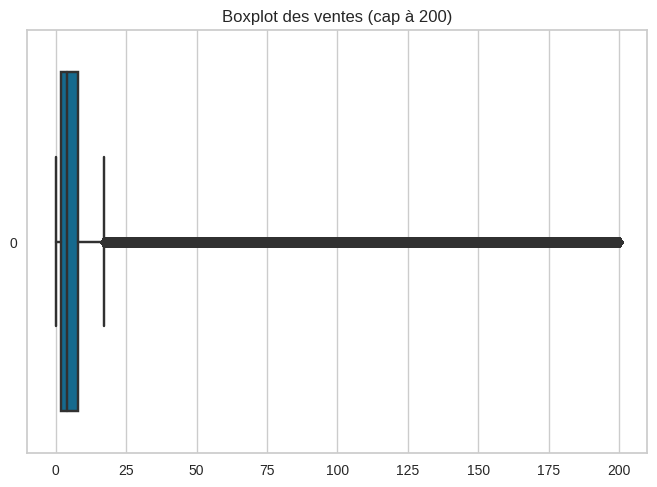

In [60]:
sns.boxplot(
    Base_merge_2017["unit_sales"].clip(0, 200),
    orient="h"
)
plt.title("Boxplot des ventes (cap à 200)")

In [64]:
cols = [
    "unit_sales",
    "transactions",
    "dcoilwtico",
    "cluster",
    "is_holiday"
]

#sns.pairplot(
   # Base_merge_2017[cols],
    #hue="is_holiday",
    #palette="Paired",
    #corner=True,
    #diag_kind="kde"
#)

### **Correlation**

In [65]:
eda_corr = Base_merge_2017[
    [
        "unit_sales",
        "transactions",
        "dcoilwtico",
        "onpromotion",
        "perishable",
        "is_holiday"
    ]
].copy()

# Conversion bool → int
for col in ["onpromotion", "perishable", "is_holiday"]:
    eda_corr[col] = eda_corr[col].astype(int)

In [66]:
corr = eda_corr.corr(method="pearson")

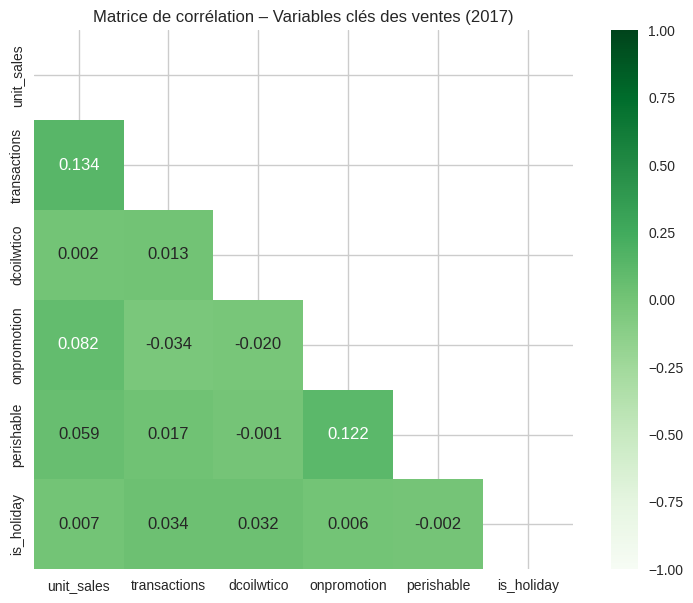

In [67]:
plt.figure(figsize=(10, 7))

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(
    corr,
    cmap="Greens",
    annot=True,
    fmt=".3f",
    square=True,
    mask=mask,
    cbar=True,
    vmin=-1,
    vmax=1
)

plt.title("Matrice de corrélation – Variables clés des ventes (2017)")
plt.show()


L'analyse de la matrice de corrélation pour l'année *2017* confirme avec précision la hiérarchie des facteurs d'influence identifiés lors des étapes précédentes. Le moteur principal des ventes reste la variable **onpromotion**, qui présente la corrélation positive la plus significative avec les ventes **(0,082)**, corroborant visuellement le bond de performance de **67 %** observé sur le camembert des promotions. Les transactions globales affichent également un lien notable avec un coefficient de **0,134**, indiquant que l'affluence en magasin en 2017 a un impact plus marqué sur le volume de vente que sur l'ensemble du jeu de données historique. À l'inverse, le prix du pétrole (dcoilwtico) maintient une corrélation quasi nulle de **0,002** avec les ventes, validant définitivement son caractère non prédictif pour les transactions quotidiennes au détail. Enfin, la faible corrélation des jours fériés (0,007) suggère que leur impact, bien que réel sur la moyenne globale, est très dilué lorsqu'il est mesuré de manière linéaire sur l'ensemble des articles de 2017.

### **Vente globale en 2017**

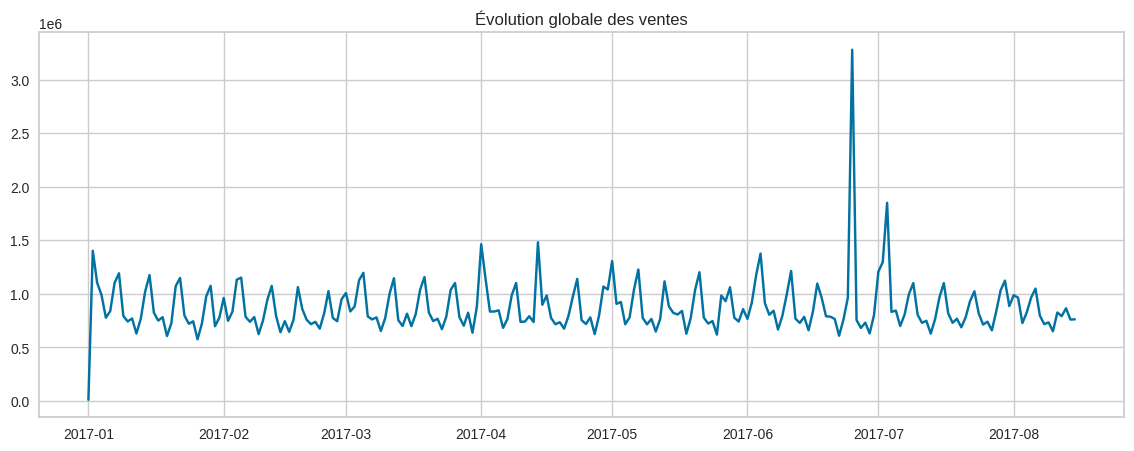

In [68]:
daily_sales = (
    Base_merge_2017.groupby("date")["unit_sales"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(14,5))
plt.plot(daily_sales["date"], daily_sales["unit_sales"])
plt.title("Évolution globale des ventes")
plt.show()


L'analyse temporelle de l'année 2017 montre une activité cyclique stable ponctuée par des pics de demande exceptionnels qui redéfinissent la structure des ventes. On observe une saisonnalité hebdomadaire régulière où les ventes oscillent généralement entre **0,5 et 1,5 million d'unités**, mais le graphique est dominé par une explosion spectaculaire fin juin 2017, atteignant un record de plus de **3 millions** d'unités en une seule journée. Ce pic massif, couplé à la volatilité extrême relevée dans les statistiques descriptives (maximum de 17 146 unités par ligne), confirme que des événements ponctuels — probablement des promotions agressives ou des préparations de jours fériés locaux — ont un impact bien plus déstabilisant sur la chaîne logistique que les tendances macroéconomiques comme le **pétrole**. Cette visualisation justifie pleinement l'utilisation de la transformation logarithmique effectuée précédemment pour "écraser" ces pics extrêmes et permettre au modèle de capturer la tendance de fond sans être aveuglé par ces anomalies de volume.

### **Reportage profil**

In [69]:
import ydata_profiling as prf
prf.__version__

'v4.17.0'

**Choix d'un echantillon**

In [70]:
Base_sample_2017 = Base_merge_2017.sample(2_000_000, random_state=42)

In [71]:
# Generate a profile report from a Dataset stored as a pandas `DataFrame`.
profile = ProfileReport(Base_sample_2017, title="Profiling Report")
profile.to_notebook_iframe()  # Used to output the HTML representation to a Jupyter notebook.
# profile.to_file("data_report.html")  # Write the report to a file.

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 20/20 [00:33<00:00,  1.66s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [74]:
# Génération du rapport de profiling au format HTML
profile.to_file("profiling_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]